In [1]:
import numpy as np
import pandas as pd
from collections import deque
import pymongo
from pymongo import MongoClient
print( 'Mongo version', pymongo.__version__)

Mongo version 3.7.0


In [28]:
import networkx as nx
import csv

In [3]:
#main db
config = {
  'host': '127.0.0.1',
  'username': 'mongo_user',
  'password': 'password',
  'authSource': 'pin'
}

client = MongoClient(**config)

db = client.pin
collection1=db.users
collection2=db.sampled_users
collection3=db.more_sampled
collection4=db.sampled1

In [4]:
collection4.find().count()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


10000

In [5]:
data = pd.DataFrame(list(collection4.find()))

In [6]:
data.head(2)

,_id,follower_count,followers,user_id
0,5b984539ab17aa07372fe7ce,2,"[17716593, 5614380\n]",18251999
1,5b984e7aab17aa0737a63207,9,"[571686, 2582835, 4134205, 16084647, 5920415, ...",27497829


In [7]:
data.drop(columns={'_id','follower_count'},inplace=True)

In [8]:
data.head()

,followers,user_id
0,"[17716593, 5614380\n]",18251999
1,"[571686, 2582835, 4134205, 16084647, 5920415, ...",27497829
2,"[8914177, 52910723, 11755559, 23326800, 164519...",24885674
3,[34244875\n],29376126
4,[],36532150


In [9]:
count=10000
datalist=[]
for index,row in data.iterrows():
    nodes = [row['user_id']]
    followers=row['followers']
    if len(followers)!=0:
        last=followers.pop()
        followers.append(last.strip('\n'))
    nodes.extend(followers)
    datalist.append(nodes)
    count-=1
    if count == 0:
        break


In [10]:
len(datalist)

10000

In [12]:
data.to_csv('sample3.txt',encoding='utf-8', index=False) #

In [29]:
num_rows = 1000
with open('newfun4.txt','w') as f:
    writer=csv.writer(f,delimiter=' ')
    writer.writerows(datalist[:num_rows])

G=nx.read_adjlist('newfun4.txt')
len(list(nx.connected_components(G))), len(G.edges()) / len(G.nodes())

(818, 0.9801628469929894)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

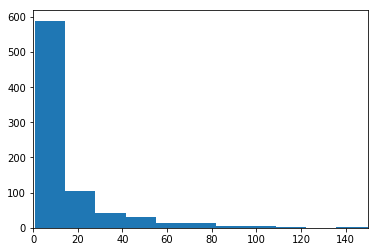

In [14]:
compt_size = [len(compt) for compt in nx.connected_components(G)]
plt.hist(compt_size, bins = 1400);
plt.xlim(0,150);

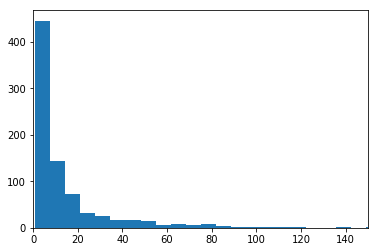

In [15]:
compt_size = [len(compt) for compt in nx.connected_components(G)]
plt.hist(compt_size, bins = 2800);
plt.xlim(0,150);

(0, 50)

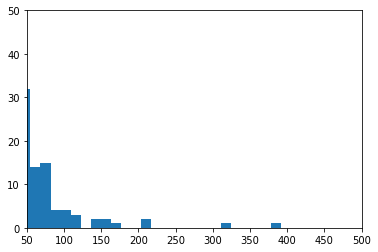

In [16]:
compt_size = [len(compt) for compt in nx.connected_components(G)]
plt.hist(compt_size, bins = 1400);
plt.xlim(50,500)
plt.ylim(0,50)

In [17]:
large=[x for x in nx.connected_components(G) if len(x)>200 ]


In [18]:
for component in large:
    print(len(component))

18864
313
390
212
213


In [19]:
for i in large:
    if len(i) == 18864:
        component1 = i
    elif len(i) == 390:
        component2 = i
    elif len(i) == 213:
        component3 = i
    else:
        pass

In [39]:
print(len(component1),len(component2),len(component3))

18864 390 213


In [21]:
%matplotlib notebook

In [22]:
G3=G.subgraph(component3)

<IPython.core.display.Javascript object>


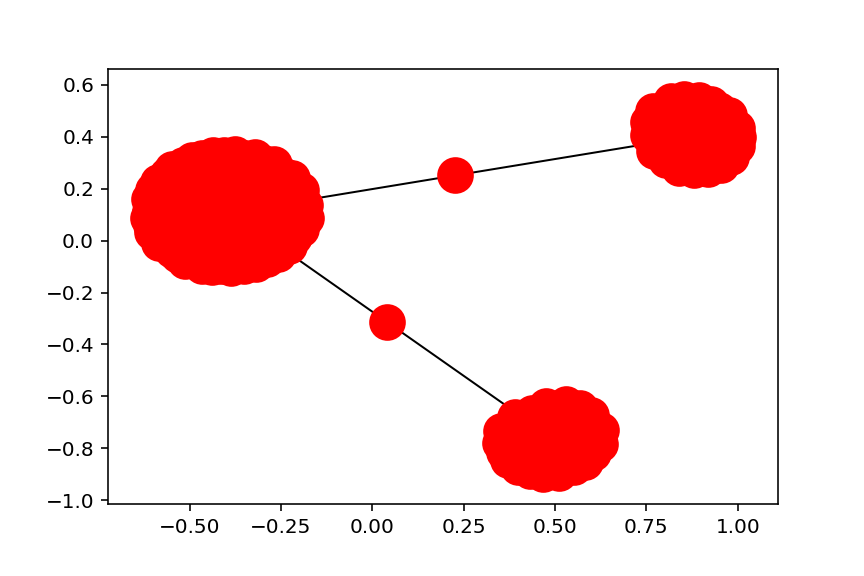

AttributeError: 'bool' object has no attribute 'items'

In [43]:
%matplotlib notebook
nx.draw_networkx(G3,labels=False)

In [41]:
len(G3.nodes())

213

In [34]:
len(G3.edges())

212